# Medical Cost Prediction

In [25]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


## Data Preparation

In [26]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [27]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Everything seems fine, there aren't null data, now I need to processing it.

## Data Preprocessing

In [30]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df['charges']

Split the data 80% training, 10% validation and 10% testing

In [31]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size = 0.2, random_state=42)

In [32]:
X_train.shape, X_test_full.shape

((1070, 6), (268, 6))

In [33]:
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, test_size = 0.5, random_state = 42)

In [34]:
X_train.shape, X_val.shape, X_test.shape

((1070, 6), (134, 6), (134, 6))

In [39]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

Use only X_train to avoid data leakage

In [40]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [41]:
X_train_normal = ct.transform(X_train)
X_val_normal = ct.transform(X_val)
X_test_normal = ct.transform(X_test)

In [43]:
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

## Creating Model Baseline

In [47]:
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])


model_01.compile(optimizer = tf.keras.optimizers.SGD(),
                 loss = 'mae',
                 metrics = ['mae'])


history_01 = model_01.fit(X_train_normal,
                          y_train,
                          epochs = 100,
                          validation_data = (X_val_normal, y_val),
                          )

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 13504.2256 - mae: 13504.2256 - val_loss: 12434.0957 - val_mae: 12434.0957
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13207.6035 - mae: 13207.6035 - val_loss: 12415.6689 - val_mae: 12415.6689
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12560.9775 - mae: 12560.9775 - val_loss: 12359.1768 - val_mae: 12359.1768
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13058.1025 - mae: 13058.1025 - val_loss: 12183.8301 - val_mae: 12183.8301
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13705.5723 - mae: 13705.5723 - val_loss: 11637.2393 - val_mae: 11637.2393
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12990.2969 - mae: 12990.2969 - val_loss: 10125.3682 - val_mae: 10125.3682
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10013.3613 - mae: 10013.3613 - val_loss: 8413.2686 - val_mae: 8413.2686
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8931.6328 - 

Helper Function #1

In [50]:
def plot_history(history):
  # Convert the history to a DataFrame
  history_df = pd.DataFrame(history.history)

  # Create the first plot for loss and val_loss
  plt.figure(figsize=(12, 5))

  # Plotting loss and validation loss
  plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
  plt.plot(history_df['loss'], label='Loss', color='blue')
  plt.plot(history_df['val_loss'], label='Validation Loss', color='orange')
  plt.title('Loss and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid()

  # Create the second plot for mae and val_mae
  plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
  plt.plot(history_df['mae'], label='Mean Absolute Error', color='green')
  plt.plot(history_df['val_mae'], label='Validation Mean Absolute Error', color='red')
  plt.title('Mean Absolute Error and Validation Mean Absolute Error')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend()
  plt.grid()

  # Show the plots
  plt.tight_layout()
  plt.show()

Helper Function #2

In [65]:
def evaluate_model_performance(history, model, X_test, y_test):
    # Get MAE from training and validation history
    model_train_mae = history.history['mae'][-1]
    model_val_mae = history.history['val_mae'][-1]

    # Evaluate model on test data
    model_test_mae = model.evaluate(X_test, y_test)[0]

    # Print the results
    print(f"Training MAE: {model_train_mae:.4f}")
    print(f"Validation MAE: {model_val_mae:.4f}")
    print(f"Test MAE: {model_test_mae:.4f}")

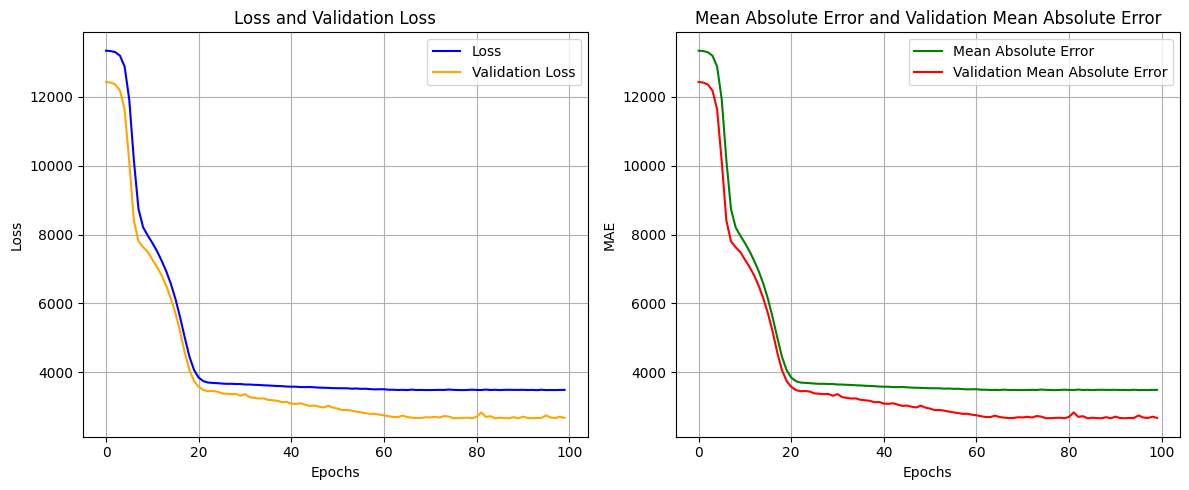

In [51]:
plot_history(history_01)

In [66]:
evaluate_model_performance(history_01, model_01, X_test_normal, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3843.7317 - mae: 3843.7317 
Training MAE: 3490.5896
Validation MAE: 2676.7109
Test MAE: 3651.5042


## Training more Models

Model 2

In [67]:
model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


model_02.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = 'mae',
                 metrics = ['mae'])


history_02 = model_02.fit(X_train_normal,
                          y_train,
                          epochs = 100,
                          validation_data = (X_val_normal, y_val),
                          )

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13073.6475 - mae: 13073.6475 - val_loss: 12437.9551 - val_mae: 12437.9551
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13276.8105 - mae: 13276.8105 - val_loss: 12424.8535 - val_mae: 12424.8535
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13496.2002 - mae: 13496.2002 - val_loss: 12393.8398 - val_mae: 12393.8398
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12757.7432 - mae: 12757.7432 - val_loss: 12333.9268 - val_mae: 12333.9268
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12807.5283 - mae: 12807.5283 - val_loss: 12233.7715 - val_mae: 12233.7715
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13911.9990 - mae: 13911.9990 - val_loss: 12082.1152 - val_mae: 12082.1152
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12616.3936 - mae: 12616.3936 - val_loss: 11869.2764 - val_mae: 11869.2764
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13112.7490

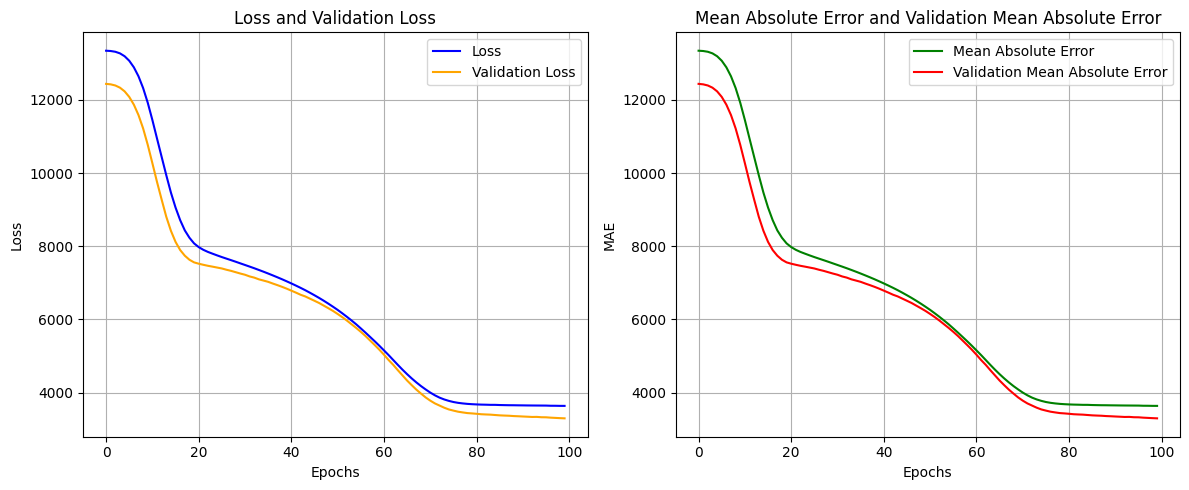

In [68]:
plot_history(history_02)

In [70]:
evaluate_model_performance(history_02, model_02, X_test_normal, y_test),
evaluate_model_performance(history_01, model_01, X_test_normal, y_test),

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3446.3723 - mae: 3446.3723 
Training MAE: 3636.5991
Validation MAE: 3296.0833
Test MAE: 3587.4333
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3843.7317 - mae: 3843.7317 
Training MAE: 3490.5896
Validation MAE: 2676.7109
Test MAE: 3651.5042


(None,)

## Creating a better NN

If I'm not using Activation functions it is not better that using a Linear Regression

In [71]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

In [73]:
model_03 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer= 'he_normal'),
    tf.keras.layers.Dense(10, activation = 'relu', kernel_initializer= 'he_normal'),
    tf.keras.layers.Dense(1),
])

model_03.compile(optimizer = 'nadam',
                 loss = 'mae',
                 metrics = ['mae'])

history_03 = model_03.fit(X_train_normal,
                          y_train,
                          epochs = 1000,
                          callbacks = [early_stopping],
                          validation_data = (X_val_normal, y_val),
                          )

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13154.5254 - mae: 13154.5254 - val_loss: 12440.3369 - val_mae: 12440.3369
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13215.0020 - mae: 13215.0020 - val_loss: 12435.6553 - val_mae: 12435.6553
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13279.4072 - mae: 13279.4072 - val_loss: 12426.7012 - val_mae: 12426.7012
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13488.9443 - mae: 13488.9443 - val_loss: 12409.2881 - val_mae: 12409.2881
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13347.7168 - mae: 13347.7168 - val_loss: 12377.8213 - val_mae: 12377.8213
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13428.7041 - mae: 13428.7041 - val_loss: 12326.4512 - val_mae: 12326.4512
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13509.9199 - mae: 13509.9199 - val_loss: 12250.2920 - val_mae: 12250.2920
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13

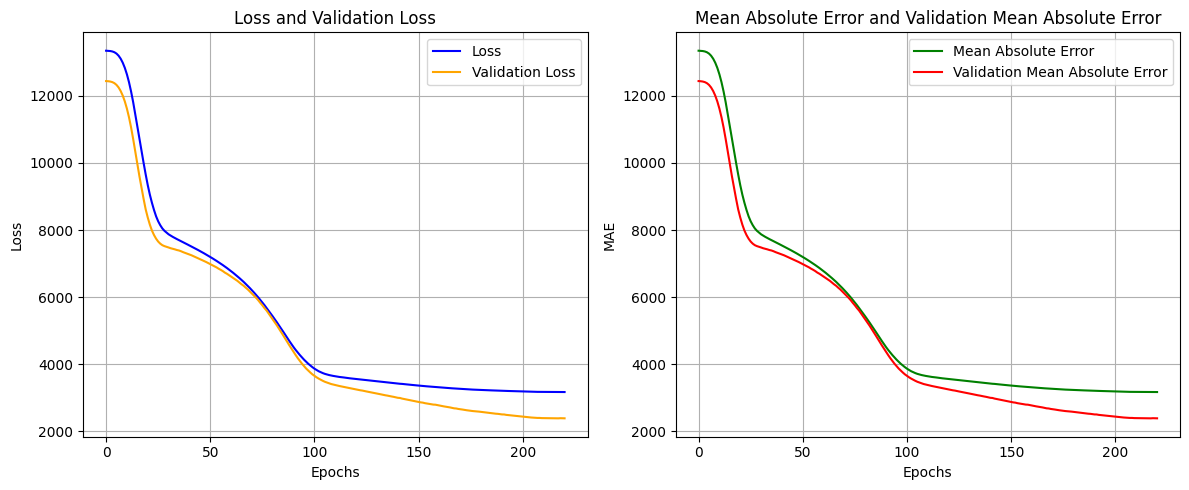

In [74]:
plot_history(history_03)

In [76]:
evaluate_model_performance(history_01, model_01, X_test_normal, y_test)
evaluate_model_performance(history_02, model_02, X_test_normal, y_test)
evaluate_model_performance(history_03, model_03, X_test_normal, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3843.7317 - mae: 3843.7317 
Training MAE: 3490.5896
Validation MAE: 2676.7109
Test MAE: 3651.5042
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3446.3723 - mae: 3446.3723 
Training MAE: 3636.5991
Validation MAE: 3296.0833
Test MAE: 3587.4333
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3475.0813 - mae: 3475.0813 
Training MAE: 3174.1484
Validation MAE: 2391.1235
Test MAE: 3298.6694


In [90]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=30) # setting a higher patience

In [86]:

model_04 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(50, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(10, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(1),
])

model_04.compile(optimizer = 'nadam',
                 loss = 'mae',
                 metrics = ['mae'])

history_04 = model_04.fit(X_train_normal,
                         y_train,
                         epochs = 1000,
                         validation_data = (X_val_normal, y_val),
                         callbacks = [early_stopping],
                         )

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 13104.7793 - mae: 13104.7793 - val_loss: 12411.3818 - val_mae: 12411.3818
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13496.1885 - mae: 13496.1885 - val_loss: 12072.4580 - val_mae: 12072.4580
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13323.2666 - mae: 13323.2666 - val_loss: 10106.7734 - val_mae: 10106.7734
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10280.9336 - mae: 10280.9336 - val_loss: 7673.9766 - val_mae: 7673.9766
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7865.8701 - mae: 7865.8701 - val_loss: 7466.6660 - val_mae: 7466.6660
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7396.8730 - mae: 7396.8730 - val_loss: 7193.0708 - val_mae: 7193.0708
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7090.0947 - mae: 7090.0947 - val_loss: 6922.2539 - val_mae: 6922.2539
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6993.1396 - mae:

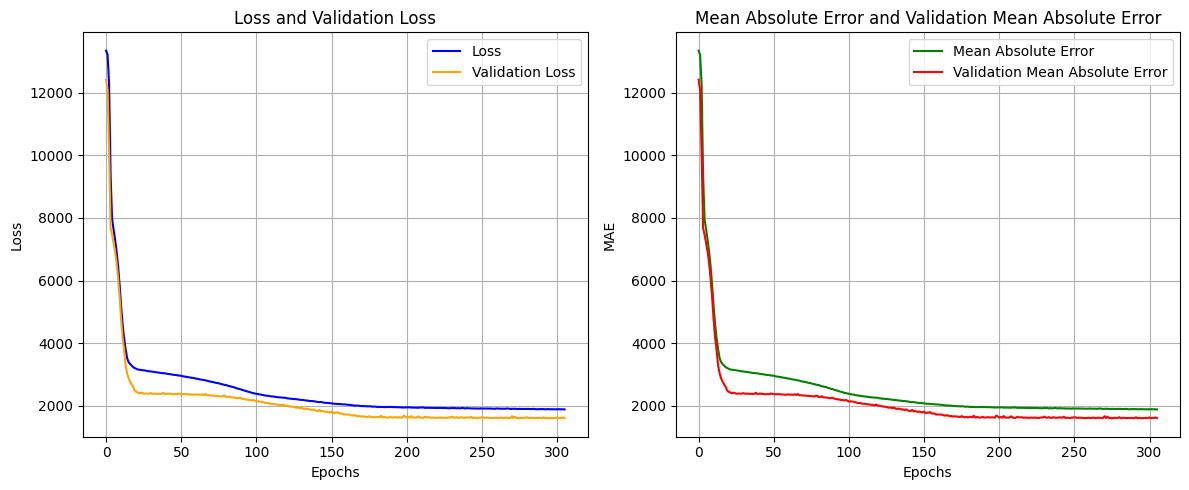

In [88]:
plot_history(history_04)

In [89]:
evaluate_model_performance(history_01, model_01, X_test_normal, y_test)
evaluate_model_performance(history_02, model_02, X_test_normal, y_test)
evaluate_model_performance(history_03, model_03, X_test_normal, y_test)
evaluate_model_performance(history_04, model_04, X_test_normal, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3843.7317 - mae: 3843.7317 
Training MAE: 3490.5896
Validation MAE: 2676.7109
Test MAE: 3651.5042
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3446.3723 - mae: 3446.3723 
Training MAE: 3636.5991
Validation MAE: 3296.0833
Test MAE: 3587.4333
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3475.0813 - mae: 3475.0813 
Training MAE: 3174.1484
Validation MAE: 2391.1235
Test MAE: 3298.6694
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1668.5511 - mae: 1668.5511 
Training MAE: 1891.0302
Validation MAE: 1614.0989
Test MAE: 1789.7367


## Conclusion

The model demonstrates effective predictive capabilities, achieving a Training MAE of 1891.0302, a Validation MAE of 1614.0989, and a Test MAE of 1789.7367, indicating good performance and generalization to unseen data without overfitting. The close alignment of the Test MAE with the Training MAE reinforces the model's reliability across different datasets.

While the results are promising, further improvements can be made through hyperparameter tuning, exploring different architectures, and incorporating regularization techniques. Additionally, utilizing metrics like RMSE or R² can provide a more comprehensive evaluation of the model's performance.

## Predictions

In [97]:
# Sample input data for predictions
data = {
    'age': [19, 18, 28, 33, 32],
    'sex': ['female', 'male', 'male', 'male', 'male'],
    'bmi': [27.900, 33.770, 33.000, 22.705, 28.880],
    'children': [0, 1, 3, 0, 0],
    'smoker': ['yes', 'no', 'no', 'no', 'no'],
    'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest']
}

# Create a DataFrame
new_data = pd.DataFrame(data)

# Transform the new data using the fitted column transformer
X_new_normal = ct.transform(new_data)

# Make predictions using the trained model
predictions = model_04.predict(X_new_normal)

# Display predictions
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[21648.871 ]
 [ 1688.4219]
 [ 4398.348 ]
 [ 4064.0264]
 [ 3861.6655]]
